## 1. Data Preprocessing

In [1]:
#importing required libraries
import pandas as pd
import missingno as msno 
import numpy as np
import imblearn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn import metrics 
from sklearn.metrics import roc_curve

In [2]:
#read the data
data= pd.read_csv("D:/7150CEM/Data/FinalData/SecondYear.csv")
#Dropping target feature
data1 = data.drop('class',axis=1)
y = data['class']
#data visualization
data1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,243000.0,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,2179.5,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,3668.6,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,1273.8,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,18209.0,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874


In [3]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10172 non-null  float64
 1   Attr2   10172 non-null  float64
 2   Attr3   10172 non-null  float64
 3   Attr4   10151 non-null  float64
 4   Attr5   10149 non-null  float64
 5   Attr6   10172 non-null  float64
 6   Attr7   10172 non-null  float64
 7   Attr8   10155 non-null  float64
 8   Attr9   10169 non-null  float64
 9   Attr10  10172 non-null  float64
 10  Attr11  10172 non-null  float64
 11  Attr12  10151 non-null  float64
 12  Attr13  10110 non-null  float64
 13  Attr14  10172 non-null  float64
 14  Attr15  10161 non-null  float64
 15  Attr16  10154 non-null  float64
 16  Attr17  10155 non-null  float64
 17  Attr18  10172 non-null  float64
 18  Attr19  10109 non-null  float64
 19  Attr20  10110 non-null  float64
 20  Attr21  7009 non-null   float64
 21  Attr22  10172 non-null  float64
 22

In [4]:
#looking for null values
data1.isnull().sum()

Attr1       1
Attr2       1
Attr3       1
Attr4      22
Attr5      24
         ... 
Attr60    543
Attr61     16
Attr62     63
Attr63     22
Attr64    212
Length: 64, dtype: int64

<Axes: >

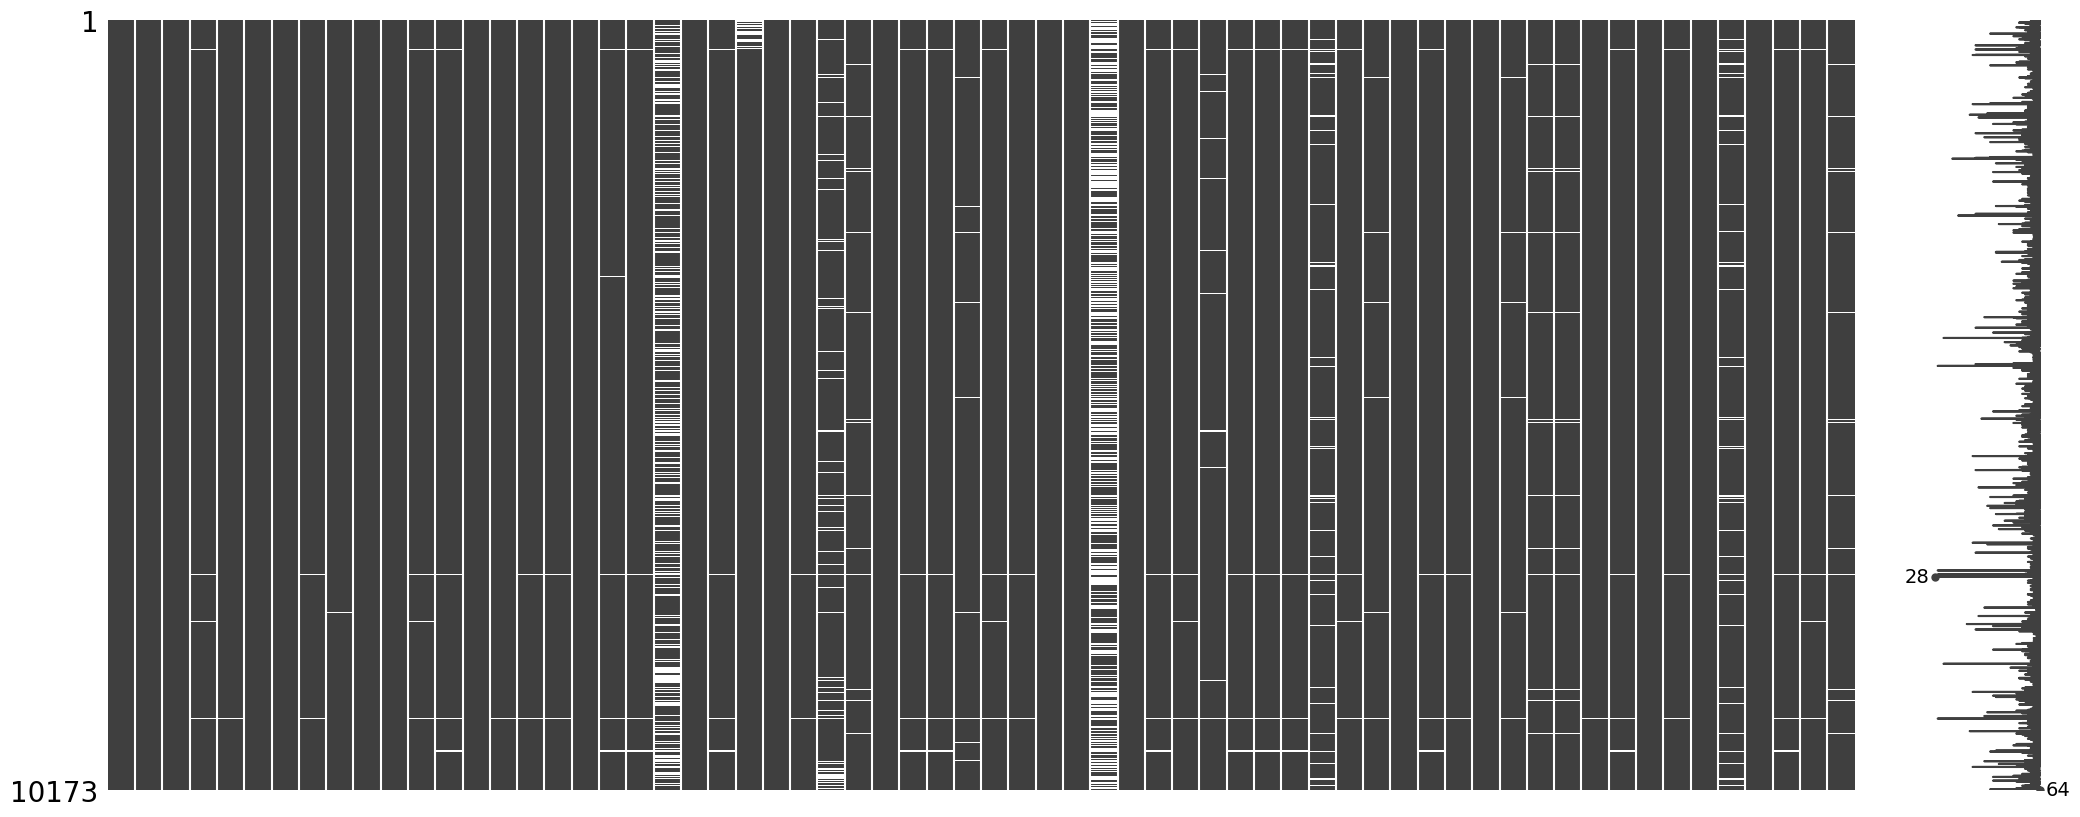

In [5]:
#Matrix for the Missing values
msno.matrix(data1)

In [6]:
#drop the null values
data_1st=data1.dropna()

In [7]:
#calculate data loss percentage
per_1st = ((len(data1)-len(data_1st))/len(data1))*100
print("percentage of data loss after removing the null values: ", per_1st)

percentage of data loss after removing the null values:  59.81519709033717


## 2. Data Imputation
### 2.1 KNN Imputation

In [8]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(data1)

In [9]:
# Final Data 
data1 = pd.DataFrame(df_filled)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10173 non-null  float64
 1   1       10173 non-null  float64
 2   2       10173 non-null  float64
 3   3       10173 non-null  float64
 4   4       10173 non-null  float64
 5   5       10173 non-null  float64
 6   6       10173 non-null  float64
 7   7       10173 non-null  float64
 8   8       10173 non-null  float64
 9   9       10173 non-null  float64
 10  10      10173 non-null  float64
 11  11      10173 non-null  float64
 12  12      10173 non-null  float64
 13  13      10173 non-null  float64
 14  14      10173 non-null  float64
 15  15      10173 non-null  float64
 16  16      10173 non-null  float64
 17  17      10173 non-null  float64
 18  18      10173 non-null  float64
 19  19      10173 non-null  float64
 20  20      10173 non-null  float64
 21  21      10173 non-null  float64
 22

In [10]:
#rename column values
data1.columns=['ROA', 'TDTA', 'WCTA','CAAL','DIR','REL','EBIT','BV','ATR','ETA','GPEIFE','GPL','GPDS','GPI','LGPD','GPDL','TATL','GPA','Revenue','ITS','NS','OCFTA','NPS','GPA_3','ESTA','SR','POATFE','WCFA','FS','TLCS','GPIS','CLTCOGS','OPSL','OPTL','PSTA','ATR','CAIL','CCTA','PSS','CAIRSL','TLOAD','POAS','RRIT','RS','PI','CAISL','ICOGS','POADTA_EBITDA','POADS_EBITDA','CR','SLTA','SLCOGS','EFAR','CCFA','WC','SCOGSS','CAISL_SGPD','CSR','LLE','SI','STR','SLS','SSL','SFA']
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ROA            10173 non-null  float64
 1   TDTA           10173 non-null  float64
 2   WCTA           10173 non-null  float64
 3   CAAL           10173 non-null  float64
 4   DIR            10173 non-null  float64
 5   REL            10173 non-null  float64
 6   EBIT           10173 non-null  float64
 7   BV             10173 non-null  float64
 8   ATR            10173 non-null  float64
 9   ETA            10173 non-null  float64
 10  GPEIFE         10173 non-null  float64
 11  GPL            10173 non-null  float64
 12  GPDS           10173 non-null  float64
 13  GPI            10173 non-null  float64
 14  LGPD           10173 non-null  float64
 15  GPDL           10173 non-null  float64
 16  TATL           10173 non-null  float64
 17  GPA            10173 non-null  float64
 18  Revenu

## 3. Data Standardization

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into 80-20 ratio
X_train,X_test,y_train,y_test= train_test_split(data1,y,test_size=0.2,random_state = 42)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4. Data Balance

In [12]:
# target feature 'class' Count
class_0 = data[data['class'] == 0]
class_1 = data[data['class'] == 1]
#print the shape of the class variable
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (9773, 65)
class 1: (400, 65)


### 4.1 SMOTE Over-Sampling technique

In [13]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train,y_train)

## 5. Feature Selection
### 5.1 PCA Analysis

variance expalined: [7.49293396e-01 2.36211151e-01 2.66769560e-03 2.40391507e-03
 1.91814375e-03 1.56061547e-03 1.33082645e-03 1.11221629e-03
 9.10060679e-04 7.90951358e-04 2.96696752e-04 2.74658721e-04
 2.64211913e-04 2.12670553e-04 1.98613282e-04 1.79719231e-04
 8.39828838e-05 6.98546231e-05 5.46762080e-05 3.60400332e-05
 3.18319751e-05 2.42729223e-05 1.62515162e-05 1.48466915e-05
 1.37347224e-05 1.02969403e-05 6.63689551e-06 1.86185488e-06
 1.55115294e-06 1.16215368e-06 1.09762234e-06 8.84270152e-07
 8.35472544e-07 6.69961725e-07 6.30212437e-07 6.23190158e-07
 5.42608393e-07 4.77638355e-07 3.51056678e-07 2.45524764e-07
 2.06020304e-07 1.76512883e-07 1.61316743e-07 1.47958374e-07
 1.27297875e-07 6.93256981e-08 4.81299152e-08 4.21288007e-08
 2.89793648e-08 2.18778729e-08 1.80295689e-08 1.59603292e-08
 1.16871392e-08 1.12462237e-08 8.45774964e-09 2.28738248e-09
 1.12545558e-09 7.99635250e-10 6.65218882e-10 1.71501292e-12
 1.65181996e-12 1.16374292e-14 7.27543939e-33 7.27543939e-33]
var

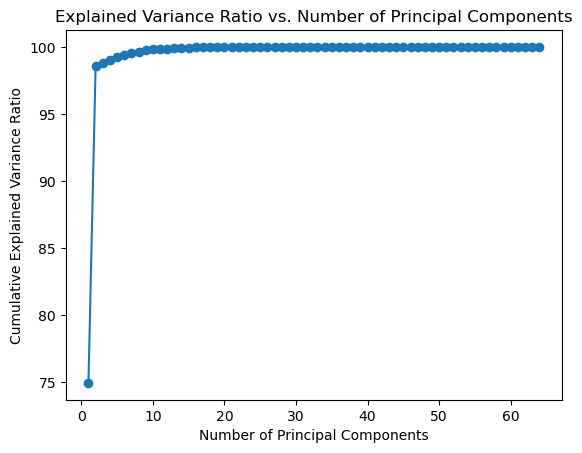

In [14]:
from sklearn.decomposition import PCA
# PCA Analysis for all components of train data
pca = PCA(n_components=64)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

variance expalined: [0.7492934  0.23621115 0.0026677  0.00240392 0.00191814 0.00156062
 0.00133083 0.00111222 0.00091006 0.00079095]
variance : [74.93 98.55 98.82 99.06 99.25 99.41 99.54 99.65 99.74 99.82]


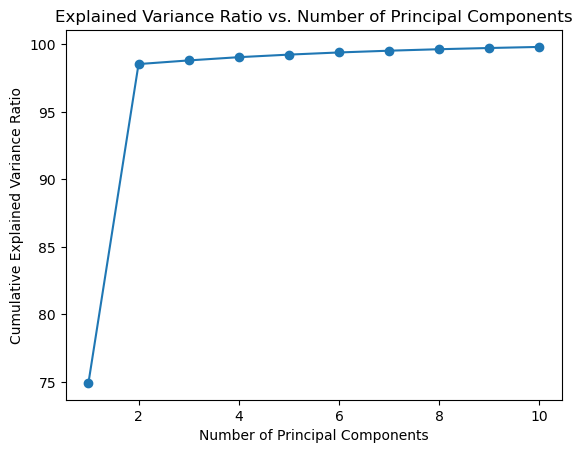

In [15]:
from sklearn.decomposition import PCA
# PCA Analysis with 10 components of train data
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()


## 6. Machine Learning techniques
### 6.1 Logistic regression

In [16]:
import sklearn.linear_model as lm 
from sklearn.linear_model import LogisticRegression
#logistic Regression
LR=lm.LogisticRegression(max_iter = 300) 
LR.fit(X_train,y_train) 
LR_pred= LR.predict(X_test) 
#train and test accuracy scores
trACC_LR=LR.score(X_train,y_train) 
tesACC_LR=LR.score(X_test,y_test) 
print('Train Accuracy for Logistic Regression : ',trACC_LR) 
print('Test Accuracy for Logistic Regression : ', tesACC_LR,"\n") #41.3


Train Accuracy for Logistic Regression :  0.5776027660391856
Test Accuracy for Logistic Regression :  0.41375921375921376 



In [17]:
#Confusion matrix
LR_cf = confusion_matrix(y_test,LR_pred) 
print('confusion matrix for LR:\n',LR_cf)

#printingcclassification report of Confusion matrix 
LR_matrix = classification_report(y_test,LR_pred) 
print('Classification Report for LR:\n',LR_matrix) 

confusion matrix for LR:
 [[ 804 1160]
 [  33   38]]
Classification Report for LR:
               precision    recall  f1-score   support

           0       0.96      0.41      0.57      1964
           1       0.03      0.54      0.06        71

    accuracy                           0.41      2035
   macro avg       0.50      0.47      0.32      2035
weighted avg       0.93      0.41      0.56      2035



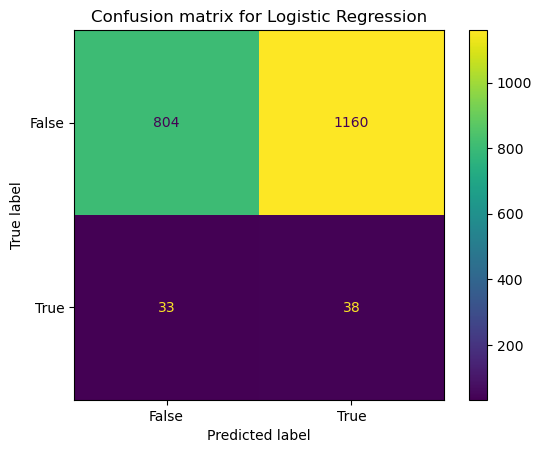

In [18]:
#plotting Confusion matrix  
LR_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cf,display_labels = [False,True]) 
LR_cm_display.plot() 
plt.title('Confusion matrix for Logistic Regression') 
plt.show()

### 6.2 Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
#Decision tree classifier
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train) 
DT_pred = DT.predict(X_test)
#train and test accuracies
trACC_DT=DT.score(X_train,y_train) 
tesACC_DT=DT.score(X_test,y_test) 
print('Train Accuracy for Decision Tree  : ',trACC_DT) 
print('Test Accuracy for Decision Tree : ', tesACC_DT,"\n") #94.54

Train Accuracy for Decision Tree  :  0.9999359713151492
Test Accuracy for Decision Tree :  0.9454545454545454 



In [20]:
#Confusion Matrix
DT_cf = confusion_matrix(y_test,DT_pred) 
print('confusion matrix for DT:\n',DT_cf) 

#Classification report of Confusion matrix 
DT_matrix = classification_report(y_test,DT_pred) 
print('Classification Report for DT:\n',DT_matrix) 


confusion matrix for DT:
 [[1924   40]
 [  71    0]]
Classification Report for DT:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1964
           1       0.00      0.00      0.00        71

    accuracy                           0.95      2035
   macro avg       0.48      0.49      0.49      2035
weighted avg       0.93      0.95      0.94      2035



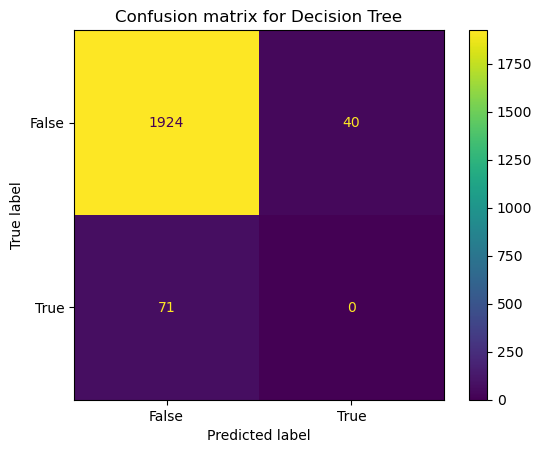

In [21]:
#plotting Confusion matrix  
DT_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_cf,display_labels = [False,True]) 
DT_cm_display.plot() 
plt.title('Confusion matrix for Decision Tree') 
plt.show()

### 6.3 Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
RF= RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train) 
RF_pred = RF.predict(X_test)
#train and test accuracies
trACC_RF=RF.score(X_train,y_train) 
tesACC_RF=RF.score(X_test,y_test) 
print('Train Accuracy for Random Forest  : ',trACC_RF) 
print('Test Accuracy for Random Forest : ', tesACC_RF,"\n") #96.51


Train Accuracy for Random Forest  :  0.9999359713151492
Test Accuracy for Random Forest :  0.9651105651105651 



In [23]:
#Confusion Matrix
RF_cf = confusion_matrix(y_test,RF_pred) 
print('confusion matrix for RF:\n',RF_cf) 

#Classification report of confusion matrix 
RF_matrix = classification_report(y_test,RF_pred) 
print('Classification Report for RF:\n',RF_matrix) 

confusion matrix for RF:
 [[1964    0]
 [  71    0]]
Classification Report for RF:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1964
           1       0.00      0.00      0.00        71

    accuracy                           0.97      2035
   macro avg       0.48      0.50      0.49      2035
weighted avg       0.93      0.97      0.95      2035



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


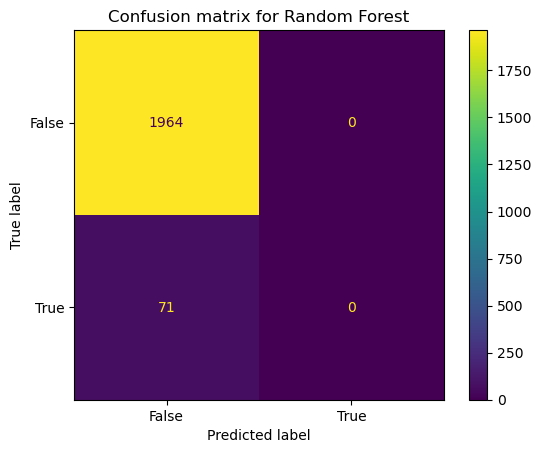

In [24]:
#plotting Confusion matrix  
RF_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_cf,display_labels = [False,True]) 
RF_cm_display.plot() 
plt.title('Confusion matrix for Random Forest') 
plt.show()

### 6.4 Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)
#train and test accuracies
trACC_GB=GB.score(X_train,y_train) 
tesACC_GB=GB.score(X_test,y_test) 
print('Train Accuracy for Gradient Boost  : ',trACC_GB) 
print('Test Accuracy for Gradient Boost : ', tesACC_GB,"\n") # 94.64


Train Accuracy for Gradient Boost  :  0.7135996926623127
Test Accuracy for Gradient Boost :  0.9464373464373464 



In [26]:
#Confusion Matrix
GB_cf = confusion_matrix(y_test,GB_pred) 
print('confusion matrix for GB:\n',GB_cf) 

#Classification report of Confusion matrix
GB_matrix = classification_report(y_test,GB_pred) 
print('Classification Report for GB:\n',GB_matrix)


confusion matrix for GB:
 [[1924   40]
 [  69    2]]
Classification Report for GB:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1964
           1       0.05      0.03      0.04        71

    accuracy                           0.95      2035
   macro avg       0.51      0.50      0.50      2035
weighted avg       0.93      0.95      0.94      2035



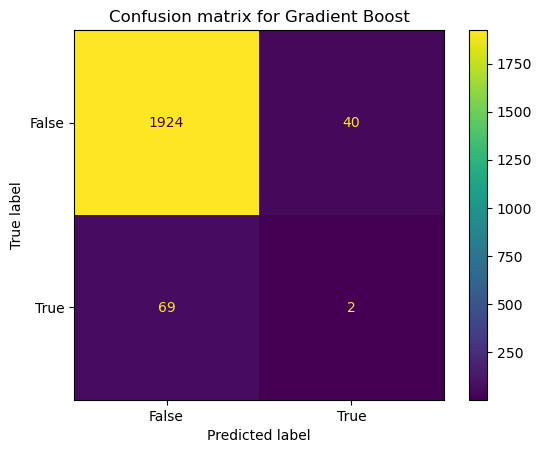

In [27]:
#plotting Confusion matrix  
GB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = GB_cf,display_labels = [False,True]) 
GB_cm_display.plot() 
plt.title('Confusion matrix for Gradient Boost') 
plt.show()

### 6.5 Extreme Gradient Boosting Classifier (XGBoosting)

In [29]:
import xgboost as xgb
# Train a XGB model using the scikit-learn API
XGB = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
#train and test Accuracies
trACC_XGB=XGB.score(X_train,y_train) 
tesACC_XGB=XGB.score(X_test,y_test) 
print('Train Accuracy for Xtreme Gradient Boost  : ',trACC_XGB) 
print('Test Accuracy for Xtreme Gradient Boost : ', tesACC_XGB,"\n") #96.51

Train Accuracy for Xtreme Gradient Boost  :  0.7463823793059291
Test Accuracy for Xtreme Gradient Boost :  0.9651105651105651 



In [30]:
#Confusion Matrix
XGB_cf = confusion_matrix(y_test,XGB_pred) 
print('confusion matrix for XGB:\n',XGB_cf) 

#Classification report of Confusion matrix 
XGB_matrix = classification_report(y_test,XGB_pred) 
print('Classification Report for XGB:\n',XGB_matrix) 


confusion matrix for XGB:
 [[1964    0]
 [  71    0]]
Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1964
           1       0.00      0.00      0.00        71

    accuracy                           0.97      2035
   macro avg       0.48      0.50      0.49      2035
weighted avg       0.93      0.97      0.95      2035



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


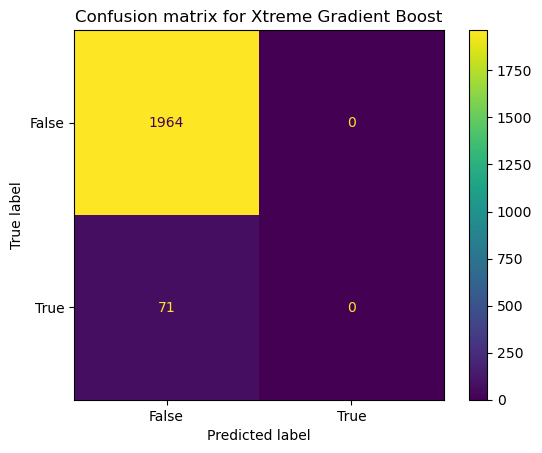

In [31]:
#plotting Confusion matrix  
XGB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = XGB_cf,display_labels = [False,True]) 
XGB_cm_display.plot() 
plt.title('Confusion matrix for Xtreme Gradient Boost') 
plt.show()

### 6.6 Support Vector Machine

In [32]:
from sklearn.svm import SVC
#Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
#train and test Accuracies
trACC_svc=svc.score(X_train,y_train) 
tesACC_svc=svc.score(X_test,y_test) 
print('Train Accuracy for SVM  : ',trACC_svc) 
print('Test Accuracy for SVM : ', tesACC_svc,"\n") #86.28


Train Accuracy for SVM  :  0.6304904597259572
Test Accuracy for SVM :  0.8628992628992629 



In [33]:
#Confusion Matrix
svc_cf = confusion_matrix(y_test,svc_pred) 
print('confusion matrix for SVM:\n',svc_cf) 

#Classification report of Confusion matrix metrics 
svc_matrix = classification_report(y_test,svc_pred) 
print('Classification Report for SVM:\n',svc_matrix) 

confusion matrix for SVM:
 [[1746  218]
 [  61   10]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      1964
           1       0.04      0.14      0.07        71

    accuracy                           0.86      2035
   macro avg       0.51      0.51      0.50      2035
weighted avg       0.93      0.86      0.90      2035



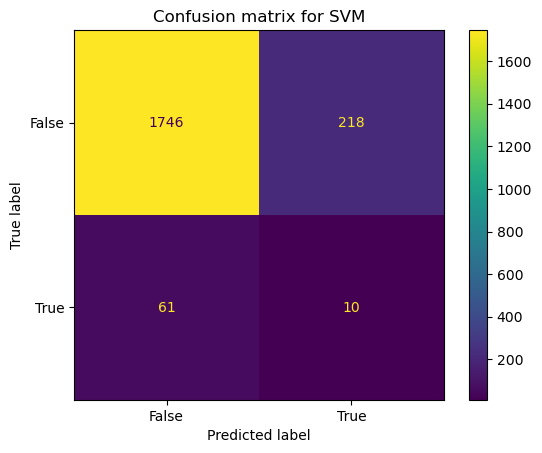

In [34]:
#plotting Confusion matrix  
svc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_cf,display_labels = [False,True]) 
svc_cm_display.plot() 
plt.title('Confusion matrix for SVM') 
plt.show()

## 7. ROC Curve

In [35]:
# ROC curve for Decision Tree 
DT_pred_prob = DT.predict_proba(X_test) 
DT_pred_prob = DT_pred_prob[:,1] 
DT_fpr,DT_tpr,_=roc_curve(y_test,DT_pred_prob) 

# ROC for Logistic regression 
LR_pred_prob = LR.predict_proba(X_test) 
LR_pred_prob = LR_pred_prob[:,1] 
LR_fpr,LR_tpr,_=roc_curve(y_test,LR_pred_prob) 

#ROC for Random Forest
RF_pred_prob = RF.predict_proba(X_test)
RF_pred_prob = RF_pred_prob[:,1]
RF_fpr,RF_tpr,_=roc_curve(y_test,RF_pred_prob)

#ROC curve for GB
GB_pred_prob = GB.predict_proba(X_test)
GB_pred_prob = GB_pred_prob[:,1]
GB_fpr,GB_tpr,_=roc_curve(y_test,GB_pred_prob)

#ROC curve for XGB
XGB_pred_prob = XGB.predict_proba(X_test)
XGB_pred_prob = XGB_pred_prob[:,1]
XGB_fpr,XGB_tpr,_=roc_curve(y_test,XGB_pred_prob)

#ROC curve for SVC
svc_pred_prob = svc.predict_proba(X_test)
svc_pred_prob = svc_pred_prob[:,1]
svc_fpr,svc_tpr,_=roc_curve(y_test,svc_pred_prob)

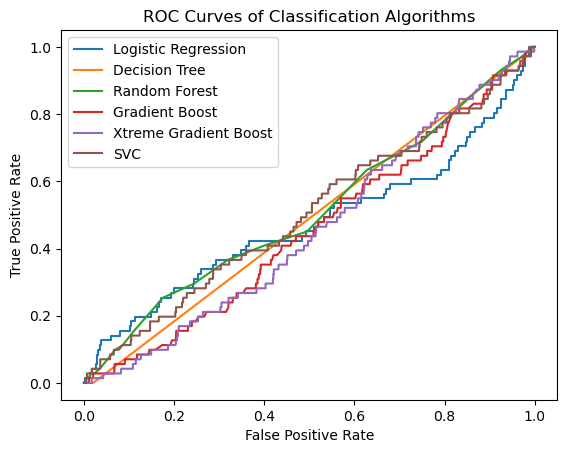

In [36]:
#plotting Roc_curve 
plt.figure() 
plt.plot(LR_fpr,LR_tpr,label = 'Logistic Regression') 
plt.plot(DT_fpr,DT_tpr,label = 'Decision Tree') 
plt.plot(RF_fpr,RF_tpr,label = 'Random Forest')
plt.plot(GB_fpr,GB_tpr,label = 'Gradient Boost')
plt.plot(XGB_fpr,XGB_tpr,label = 'Xtreme Gradient Boost')
plt.plot(svc_fpr,svc_tpr,label='SVC')
plt.title('ROC Curves of Classification Algorithms') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend() 
plt.show()

## 8. Accuracies of Machine Learning Algorithms

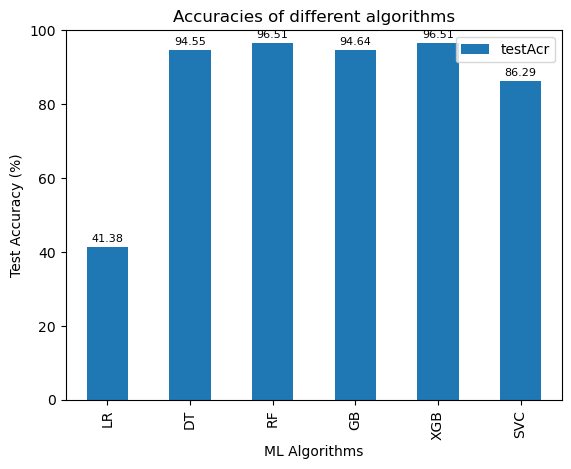

In [37]:
#Accuracy plot of Different Machine Learning methods 
dt = [['LR',trACC_LR*100,tesACC_LR*100],['DT',trACC_DT*100,tesACC_DT*100],['RF',trACC_RF*100,tesACC_RF*100],['GB',trACC_GB*100,tesACC_GB*100],['XGB',trACC_XGB*100,tesACC_XGB*100],['SVC',trACC_svc*100,tesACC_svc*100]] 
df = pd.DataFrame(dt, columns=['Name','trainAcr','testAcr']) 
plots = df.plot.bar(x='Name',y = 'testAcr',width = 0.5) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Accuracies of different algorithms') 
plt.xlabel('ML Algorithms') 
plt.ylabel('Test Accuracy (%)') 
plt.ylim(0,100)
plt.show()